# Unsupervised Learning

## Objective

We will train unsupervised machine learning models to group countries based on their socioeconomic indicators.
The goal is to identify which countries might require support or intervention according to their development conditions.

After clustering, each group will be labeled as follows:

🖤 Black – NO HELP needed

💛 Yellow – Might Need Help

❤️ Red – Help Needed

💚 Green – No Help Needed

Importing some basics libraries to plot and work with our data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Calling our data

In [2]:
data = pd.read_csv('Country-data.csv')
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
compressed_data = pd.read_pickle('compressed_countries_data.pkl')
compressed_data

,Health,Trade,Finance
0,6.239852,1.200812,1.349645
1,3.035901,1.717580,1.471658
2,3.389763,1.603752,3.165367
3,6.469020,2.430387,3.494919
4,2.964898,2.362940,2.240150
...,...,...,...
162,3.613452,2.257474,0.737840
163,3.073747,1.068624,7.902084
164,3.309933,3.461820,1.917840
165,4.771970,1.463396,3.395058


#### **Data description**

- **country:** Name of the country.
- **child_mort:** Death of children under 5 years of age per 1000 live births.
- **exports:** Exports of goods and services per capita. Given as %age of the GDP per capita.
- **health:** Total health spending per capita. Given as %age of GDP per capita.
- **imports:** Imports of goods and services per capita. Given as %age of the GDP per capita.
- **income:** Net income per person.
- **inflation:** The measurement of the annual growth rate of the Total GDP.
- **life_expec:** The average number of years a new born child would live if the current mortality patterns are to remain the same.
- **total_fer:** The number of children that would be born to each woman if the current age-fertility rates remain the same.
- **gdpp:** The GDP per capita. Calculated as the Total GDP divided by the total population.

#### Let's apply some algorithms
**K-Means Clustering vs DBSCAN Clustering vs Hierarchical Clustering model performance.**


In [4]:
col = list(data.columns)
col.remove('country')
categorical_features = ['country']
numerical_features = [*col]   #creates a list called numerical_features and assigns it 
# the remaining column names from the col list. The * operator is used to unpack the elements 
# in the col list into the numerical_features list. 

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : country
Numerical Features : child_mort exports health imports income inflation life_expec total_fer gdpp


Perform the normalization in the compressed_data

In [5]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

compressed_data['Health'] = mms.fit_transform(compressed_data[['Health']])
compressed_data['Trade'] = mms.fit_transform(compressed_data[['Trade']])
compressed_data['Finance'] = mms.fit_transform(compressed_data[['Finance']])
compressed_data.insert(loc = 0, value = list(data['country']), column = 'Country')
compressed_data.head()

,Country,Health,Trade,Finance
0,Afghanistan,0.625740,0.139614,0.079820
1,Albania,0.127451,0.199901,0.088756
2,Algeria,0.182485,0.186622,0.212808
3,Angola,0.661381,0.283058,0.236946
4,Antigua and Barbuda,0.116409,0.275189,0.145043


## K-means

K-Means Clustering is a distance based algorithm that is used for unsupervised learning that does not support categorical features.

It is the most preferred algorithm for dealing with Unsupervised Learning that does the job of finding clusters the in data but with a mathematical approach:
- Selects 2 (assume k = 2) centroids randomly.
- Distance between the centroids and all the data points are calculated.
- If the data point is closer to one of the centroids, then it gets labelled as that centroid and vice-versa.
- For the 2 clusters formed, average value of the data points, grouped with either of the centroid, is calculated and these average values are then defined as the new clusters.
- This process repeats itself untill both centroids converge to fixed points.

![kmeans.gif](kmeans.gif)



**k hyperparameter:** It defines the number of clusters or groups the data is to be divided into. For the selection of values of k.\
\
How to choose the quantity of clusters? We use 2 statistical tests:
- **Elbow Method:** 
- **Silhouette Score Method:** 



c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memor

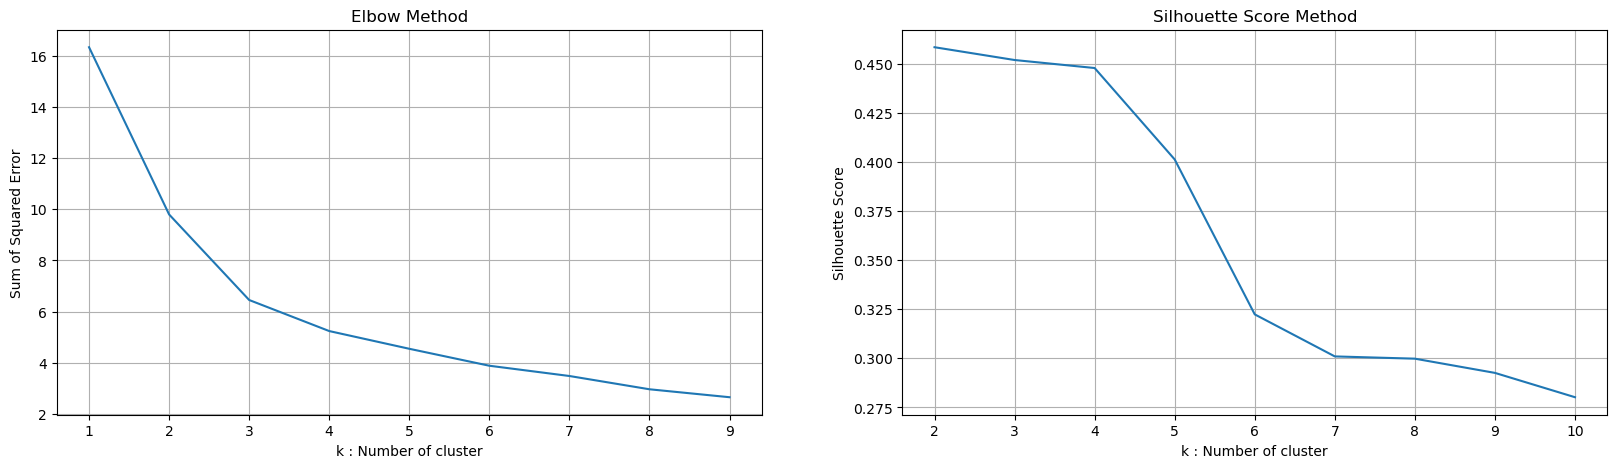

In [6]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

df_no_country = compressed_data.drop(['Country'], axis=1)

sse = {}
sil = []
kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_no_country)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()))
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(df_no_country)
    labels = kmeans.labels_
    sil.append(silhouette_score(df_no_country, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil)
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()


### Elbow or Silhouette

- Explain with your words both methods and cite what are the differences. \
(Your answer here: )



c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memor

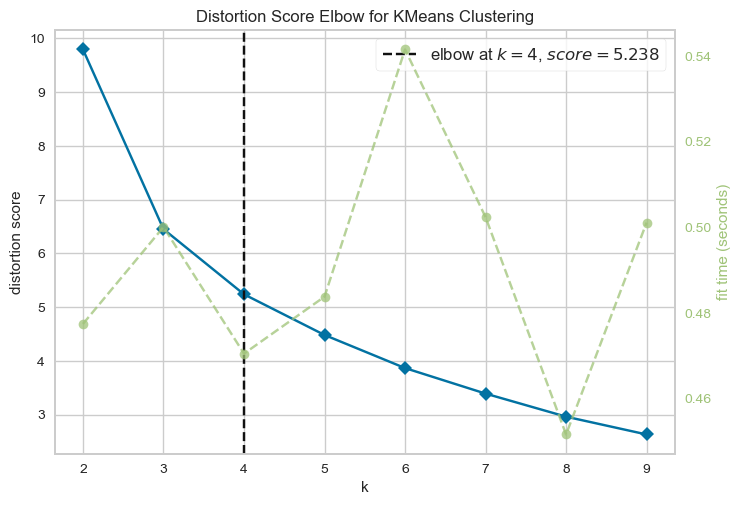

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
#Another way to get the Elbow and Silhouette together

from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer

km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))# YOUR CODE HERE
 
visualizer.fit(df_no_country)        # Fit the data to the visualizer
visualizer.show() 

Or check this: 

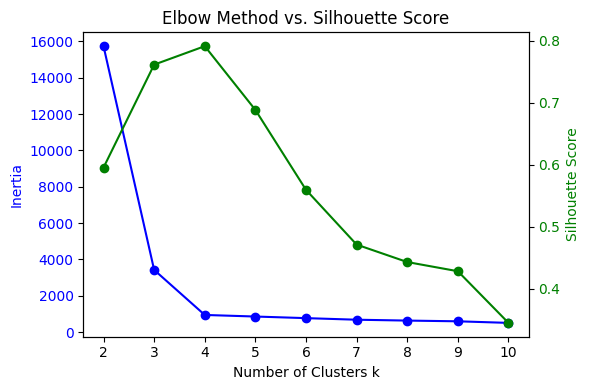


For more information: https://www.geeksforgeeks.org/machine-learning/elbow-method-vs-silhouette-score-which-is-better/

In [8]:
# Training the Kmeans model

model = KMeans(n_clusters = 4,max_iter = 1000)
model.fit(df_no_country)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_


compressed_data['Class'] = labels; data['Class'] = labels

c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\u0161169\AppData\Local\miniconda3\envs\orient\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [9]:
df_no_country

,Health,Trade,Finance
0,0.625740,0.139614,0.079820
1,0.127451,0.199901,0.088756
2,0.182485,0.186622,0.212808
3,0.661381,0.283058,0.236946
4,0.116409,0.275189,0.145043
...,...,...,...
162,0.217274,0.262886,0.035009
163,0.133337,0.124193,0.559740
164,0.170070,0.403386,0.121436
165,0.397451,0.170248,0.229632


Let's check our clusters. Which cluster represent what?

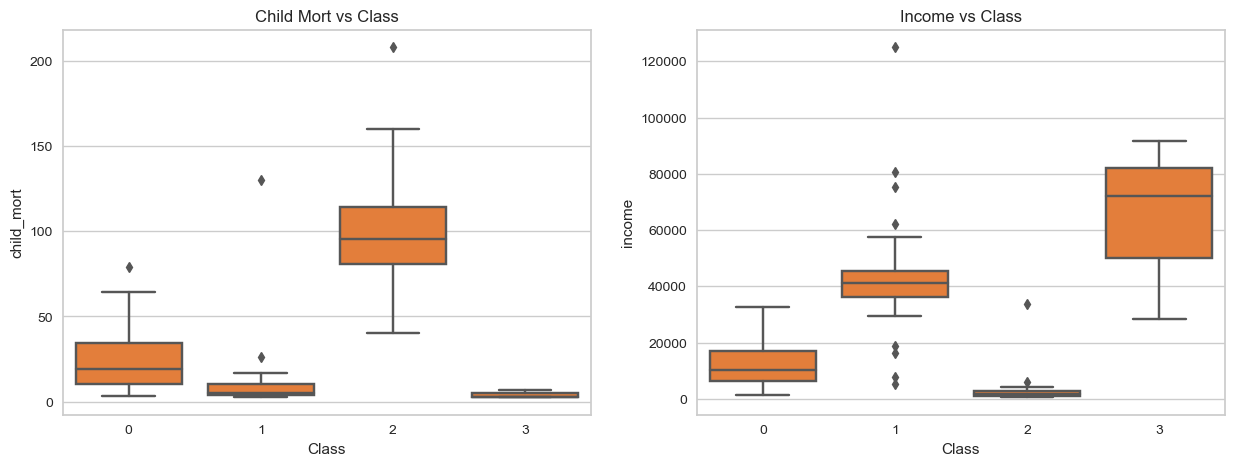

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

##   WHICH FEATURE WE COULD CHECK TO SEE THE CLASSES? Add a feature in the y

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F')
plt.title('Child Mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F')
plt.title('Income vs Class')

plt.show()

In [11]:
import plotly.express as px
import kaleido

In [12]:
compressed_data['Class'].loc[compressed_data['Class'] == 3] = 'NO HELP'
compressed_data['Class'].loc[compressed_data['Class'] == 0] = 'Might Need Help'
compressed_data['Class'].loc[compressed_data['Class'] == 1] = 'Help Needed'
compressed_data['Class'].loc[compressed_data['Class'] == 2] ='Probably no help' 

fig = px.choropleth(compressed_data[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = compressed_data['Class'],  
                    color_discrete_map={'NO HELP' : 'Black',
                                        'Might Need Help':'Yellow',
                                        'Help Needed':'Red',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

C:\Users\u0161169\AppData\Local\Temp\ipykernel_3720\629656654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  compressed_data['Class'].loc[compressed_data['Class'] == 3] = 'NO HELP'


#### **Exercise:**

- Try now a different approach to reduce the quantity of features from the data, check if the result is better.

In [13]:
#Your code here

## DBSCAN - Density Based Spatial Clustering of Application with Noise

DBSCAN Clustering is a density based clustering algorithm that is used for unsupervised learning problems.

In a bid to eliminate the problems of K-Means Clustering with nested data and high-dimensional data, DBSCAN Clustering eliminates it! It's has 3 important terms & 2 important hyperparameters :

**Terms:**
- Core Point: It is the center point that has minPts number of data points present in it's area and the points under it's area can extend the cluster.
- Non-Core Point: It is the center point that does not have minPts number of data points present in it's area and it cannot extend the cluster.
- Outliers / Noise: It is the data points that are not a part of any cluster.

![dbscan.gif](dbscan.gif)


**Hyperparameters:**
- minPts: It is the minimum number of data points that need to be present in the area of a point to be considered as a core point.
- Epsilon: It is the radius of the area of a center point.

**DBSCAN Clustering creates the clusters in the following way:**
- Select a random point and consider it as a center point from the data.
- Check the other data points that present in the area of this center point with the Epsilon value as it's radius.
- If this area has minPts number of data points in it, then the center point is considered as a core point.
- The data points in this area are then considered as core point that further extends by the same rules creating a cluster.
- If any of the point does not satisfy the rules, it is considered as non-core point that remains the part of the cluster but it cannot extend the cluster further.
- When all the core points are done with engulfing the other data points, non-core points are included & the cluster is completed.
- The next cluster then starts forming by the same rules. Some of the points don't be a part of any of the clusters, such points are known as outliers / noise.



As you might have noticed, the hyperparameters play a crucical role in this process. Thus, they have certain rules for assigning them values:
- minPts: If D represents the number of dimensions / features of a dataset, then minPts >= D + 1. Typically minPts >= 2 * D is selected for smaller or noisy datasets.
- Epsilon: It's value is usually decided using the k-distance graph that is determined from the KNN model. The value at which the graph changes sharply is selected.

In [14]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

Text(0.5, 1.0, 'K-Distance Graph')

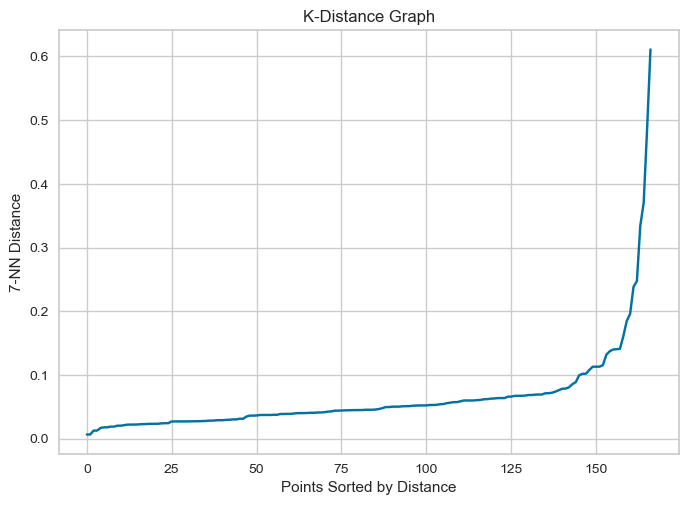

In [15]:
knn = NearestNeighbors(n_neighbors = 7)
model = knn.fit(df_no_country)
distances, indices = knn.kneighbors(df_no_country)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Points Sorted by Distance')
plt.ylabel('7-NN Distance')
plt.title('K-Distance Graph')

In [16]:
db = DBSCAN(eps = 0.080, min_samples = 8).fit(df_no_country)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Number of Clusters : ', n_clusters_)
print('Number of Outliers : ', n_noise_)

data['Class'] = labels; compressed_data['Class'] = labels

Number of Clusters :  3
Number of Outliers :  67


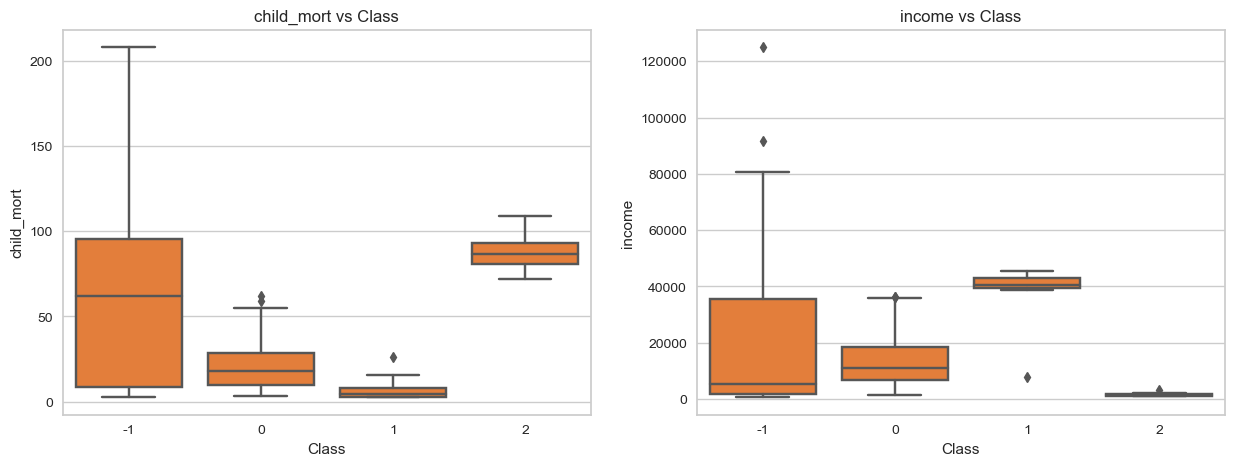

In [17]:
#Plot the distribution of the classes for the defined features (decided previously)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F')
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F')
plt.title('income vs Class')

plt.show()

By rule -1 is associated with **Noise / Outliers**!
From the above plot we can conclude:

- -1 : Noise / Outliers
- 0 : Might Need Help
- 1 : No Help Needed
- 2 : Help Needed


In [18]:
# Plot the map with the classes
compressed_data['Class'].loc[compressed_data['Class'] == -1] = 'Noise / Outliers'
compressed_data['Class'].loc[compressed_data['Class'] == 0] = 'Might Need Help'
compressed_data['Class'].loc[compressed_data['Class'] == 1] = 'No Help Needed'
compressed_data['Class'].loc[compressed_data['Class'] == 2] ='Help Needed'

fig = px.choropleth(compressed_data[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = compressed_data['Class'],  
                    color_discrete_map={'Noise / Outliers' : 'Black',
                                        'Help Needed':'Red',
                                        'Might Need Help':'Yellow',
                                        'No Help Needed':'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

C:\Users\u0161169\AppData\Local\Temp\ipykernel_3720\601446445.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Excercise**

- Your turn again. Took the same data that you used in the K-means and apply with this algorithm. Is it better?

In [19]:
#Your code here

## Hierarchical Clustering

Hierarchical Clustering is a distanced based algorithm that is used for unsupervised learning problems.

It develops the hierarchy of clusters in the form of a tree i.e known as the dendrogram. For this problem we are going to use Agglomerative Clustering which is a bottom-up approach that considers all the points as clusters and then merges them together based on their distances in the following ways :
- Initally all the points are considered as clusters.
- Then, clusters that are closer together they start merging as new cluster.
- This combined cluster then further gets compared with other clusters and the closest cluster gets merged.
- This process continues till a single large cluster is formed.

This process of forming clusters can then be viewed with a dendrogram. From it, we select the number of clusters by identifying the number of merges present at the penultimate stage. More is the length of the vertical lines, higher the distance between the clusters.

![hi_cluster.gif](hi_cluster.gif)

To select the number of clusters, we set a threshold value and count the number of vertical lines present above it. This number of vertical lines forms the number of clusters. Other methods like Silhouette Score Method and Elbow method can also be used.

**For Agglomerative Clustering**, it has 2 important hyperparameters :
- linkage: There are various connecting or linking methods for cluster i.e Single, Centroid, Average , etc.
- metric: It is the distance formula that compares the distance before merging the clusters.

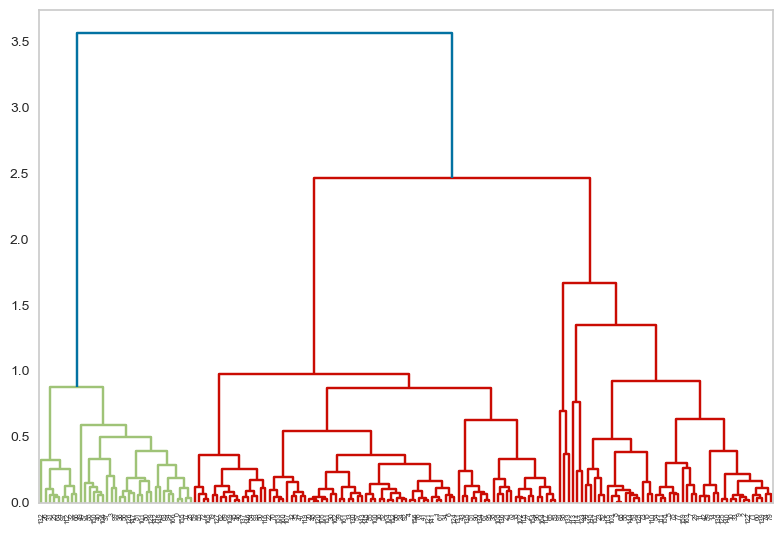

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(df_no_country, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.grid()
plt.tight_layout()
plt.show()

Let's go to the algorithm

In [21]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html


from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
labels = hierarchical_cluster.fit(df_no_country)

pred_agc = pd.Series(hierarchical_cluster.labels_)
data['Class'] = pred_agc; compressed_data['Class'] = pred_agc

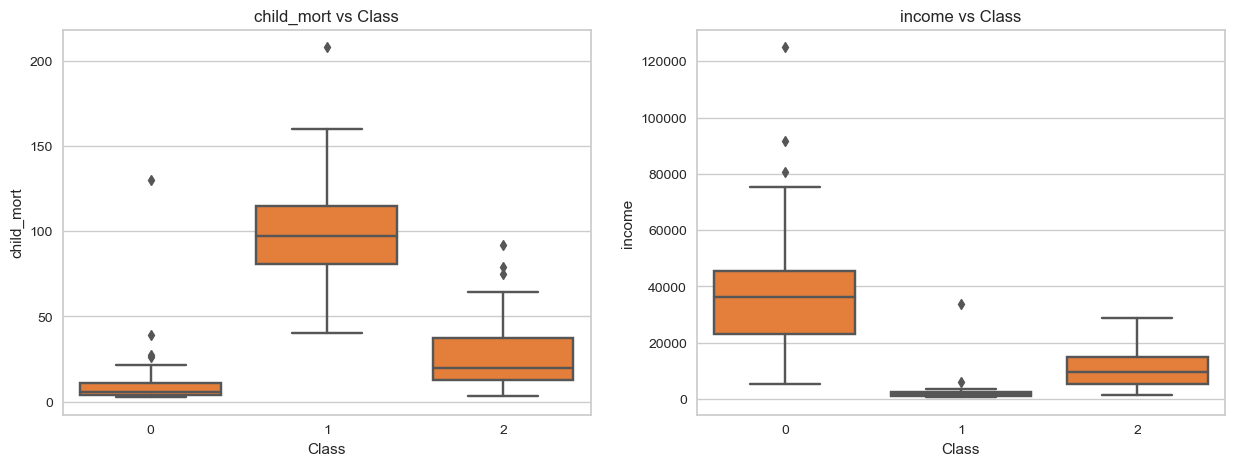

In [22]:
#Plot the distribution of the classes for the defined features (decided previously)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = data, color = '#FF781F')
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class', y = 'income', data  = data, color = '#FF781F')
plt.title('income vs Class')

plt.show()

In [23]:
# Plot the map with the classes
compressed_data['Class'].loc[compressed_data['Class'] == 0] = 'No Help Needed'
compressed_data['Class'].loc[compressed_data['Class'] == 1] = 'Help Needed'
compressed_data['Class'].loc[compressed_data['Class'] == 2] = 'Might Need Help'

fig = px.choropleth(compressed_data[['Country','Class']],
                    locationmode = 'country names',
                    locations = 'Country',
                    title = 'Needed Help Per Country (World)',
                    color = compressed_data['Class'],  
                    color_discrete_map = {'Help Needed' : 'Red',
                                          'Might Need Help' : 'Yellow',
                                          'No Help Needed' : 'Green'})
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

C:\Users\u0161169\AppData\Local\Temp\ipykernel_3720\2236021623.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Exercise:**

Your time again, train the same model with the other dataset and check the performance

In [24]:
#Your code here

#### Lessons learned:

- A model's performance is the reflection of the quality of the data feed to it. EDA section of this dataset provides a list of insights. Effect of normalization and standardization is massive on model performance.
- Feature engineering is pivotal! For feature combination & PCA data, complexity of methods to achieve it is clearly visible. These processes highlight the various options open and thus requires us to be sensible in choosing the methods depending on the data and the problem statement.
- K-Means Clustering, Hierarchical Clustering and DBSCAN Clustering are fundamentally different. They are based on different principles, thus displaying the difference in the model performances. Overall the model performances are not as great.

Adaptation from: https://www.kaggle.com/code/tanmay111999/clustering-pca-k-means-dbscan-hierarchical/notebook